# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe from the .csv file.
df = pd.read_csv(r"/Users/cathleen/Downloads/StudentPerformanceFactors.csv")
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [78]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [80]:
#Check for missing data values in each column
df.isnull().sum()
 

# We get the total count of missing values per column.
# There are 78, 90 and 67 missing values found in Teacher_Quality, Parental_Education_Level, and Distance_from_Home. 
# Need to decide to drop these row or fill in the missing values. 
# Options: dropna, fillna, or interpolate.  


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [81]:
# # Using conditional filtering combined with the isna() function to look more closely at the rows.
# # rows = df[pd.isna(df['Teacher_Quality'])]
# rows = df[pd.isna(df['Parental_Education_Level'])]
rows = df[pd.isna(df['Distance_from_Home'])]
rows

# All of the isna() show a NaN


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
359,15,64,Medium,Medium,Yes,6,76,High,Yes,2,Medium,Medium,Private,Positive,4,Yes,High School,NaN,Female,63
380,15,70,High,Medium,No,9,57,Medium,Yes,1,Medium,Medium,Private,Negative,3,No,High School,NaN,Female,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,11,72,High,Low,No,8,55,High,Yes,0,Medium,Low,Public,Neutral,3,Yes,College,NaN,Male,60
6494,14,77,Medium,Medium,Yes,4,81,Low,Yes,3,Medium,Medium,Private,Neutral,3,No,College,NaN,Female,66
6496,26,77,Low,Medium,Yes,7,71,High,Yes,3,High,Medium,Public,Neutral,3,No,High School,NaN,Female,69
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70


In [82]:
# Maybe use interpolate for the two columns that have just low, medium and high values.  


#From ChocolateBarAnalysis, I see I can calculate the percentate of null values in each of the column.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



Hours_Studied - 0%
Attendance - 0%
Parental_Involvement - 0%
Access_to_Resources - 0%
Extracurricular_Activities - 0%
Sleep_Hours - 0%
Previous_Scores - 0%
Motivation_Level - 0%
Internet_Access - 0%
Tutoring_Sessions - 0%
Family_Income - 0%
Teacher_Quality - 1%
School_Type - 0%
Peer_Influence - 0%
Physical_Activity - 0%
Learning_Disabilities - 0%
Parental_Education_Level - 1%
Distance_from_Home - 1%
Gender - 0%
Exam_Score - 0%


The percentage of nulls in each of the three columns is 1%.  Since it is such a low percentage I'm going to leave them for now.  I'll come back to clean them if I find it is necessary. 

UPDATE:  After spending time with the data set in Tableau I feel that I need to do two things:  Fistly, drop the nulls because that will make things just plain easier when I make the parameters and then  change the string values to integers.  It seems that since I am trying to draw a correlation to find what influence the exam scores the most I need to use a scatterplot or some other kind of correlation tool.  I can't do that with mixed data types.  

In [83]:

# Drop rows with nulls in specific columns
# df = df.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])


# Replace nulls with the mode (most frequent value) for categorical columns
# df['Parental_Education_Level'], ['Distance_from_Home'], ['Teacher_Quality'] = df['Parental_Education_Level'], ['Teacher_Quality'], ['Distance_from_Home'].fillna(df['Parental_Education_Level'], ['Teacher_Quality'], ['Distance_from_Home'].mode()[0])
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


#Show if the null values are replaced.
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [84]:
# To find outliers, or abnormal data:
# Start with the summary statistics 
df.describe()


#  I realize that I can calculate outliers by applying the IQR method.d
df_numeric = df.select_dtypes(include=[np.number])
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()

print("\nPotential outliers based on IQR for the 7 numerical columns:")
print(outliers_iqr)




Potential outliers based on IQR for the 7 numerical columns:
Hours_Studied         43
Attendance             0
Sleep_Hours            0
Previous_Scores        0
Tutoring_Sessions    430
Physical_Activity      0
Exam_Score           104
dtype: int64


<Axes: ylabel='Frequency'>

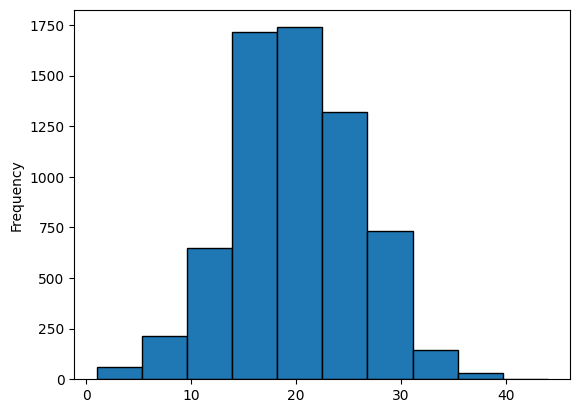

In [85]:
# Visualize outliers with scatterplot.
# df.plot.scatter(x='Exam_Score', y='Hours_Studied', alpha=0.6, edgecolor='black')
df['Hours_Studied'].plot.hist(edgecolor='black')

<Axes: ylabel='Frequency'>

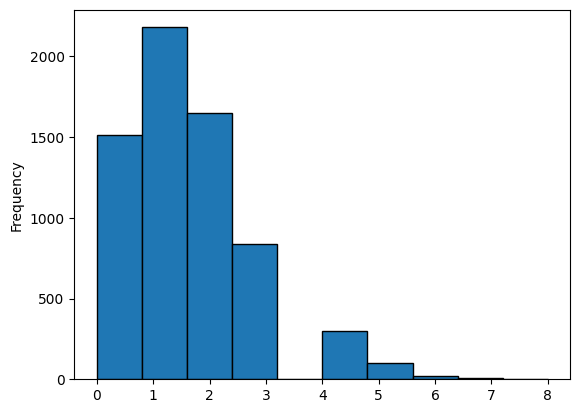

In [86]:
# Visualize outliers
df['Tutoring_Sessions'].plot.hist(edgecolor='black')


<Axes: ylabel='Frequency'>

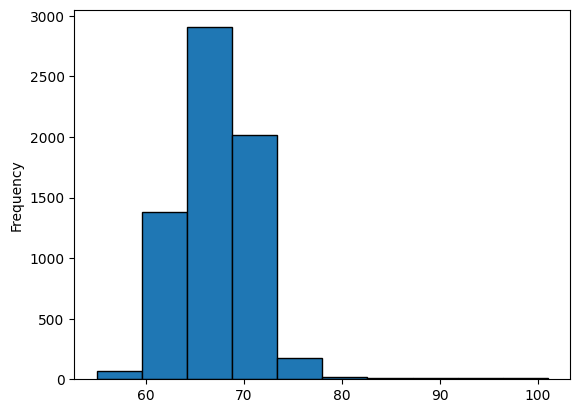

In [87]:

df['Exam_Score'].plot.hist(edgecolor='black')

Although we do get outliers with the IQR method and we can see them in the histograms, I do not think that the data is abnormal.  All of the outliers do seem to be possible, ie. I can imagine that there are a few students who would study 44 hours in a week, have 8 tutoring session or that the final exam score is a bell curve.  

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [88]:
#If data is unnecessary then drop().  
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
6602    False
6603    False
6604    False
6605    False
6606    False
Length: 6607, dtype: bool

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [89]:
#Looking to see if there is inconsistent data: 
df.head(50)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


The data format is simple and I there doesn't appear to be any inconsistencies.  There is no need to take action now. 


I was having a hard time seeing how I could show how the string data is influencing the exam_score data.   I could use scatter plot to plot two integers but I could not do that with a string and an integer.   After going around in circles with this in Tableau I started to think that maybe I should somehow convert the strings to integers.  I went back to Kaggle and s Something like this:  

In [90]:
# Convert to integers 
# Low =1, Medium = 2, and High = 3 .
# Negative = 1, Neutral = 2 and Positive = 3.
# [Learning_Disabilities],[Internet_Access] Yes = 2 and No =1
# High School = 1,  College = 2, Postgraduate = 3 
# [Learning_Disabilities] No = 2, Yes = 1
# Near = 3, Moderate = 2, Far = 1
# [Gender] Male = 1, Female = 2


# I found this code using enumerate(unique_values) and it is a very efficient way to change all of these different strings to a unique integer.
# I realized this doesn't work because it assigns values that don't make sense to my brain.  
# for column in df.select_dtypes(include=['object']).columns:
#     unique_values = df[column].unique()
#     mapping = {value: i for i, value in enumerate(unique_values)}
#     df[column] = df[column].map(mapping)


# Replace values with the corresponding integers. Using replace() to do it directly.
df = df.replace({
    "Parental_Involvement": {"Low": 1, "Medium": 2, "High": 3},
    "Access_to_Resources": {"Low": 1, "Medium": 2, "High": 3},
    "Extracurricular_Activities": {"Yes": 2, "No": 1},
    "Motivation_Level": {"Low": 1, "Medium": 2, "High": 3},
    "Internet_Access": {"Yes": 2, "No": 1},
    "Family_Income": {"Low": 1, "Medium": 2, "High": 3},
    "Teacher_Quality": {"Low": 1, "Medium": 2, "High": 3},
    "School_Type": {"Private": 2, "Public": 1},
    "Peer_Influence": {"Negative": 1, "Neutral": 2, "Positive": 3},
    "Learning_Disabilities": {"No": 2, "Yes": 1},
    "Parental_Education_Level": {"High School": 1, "College": 2, "Postgraduate": 3},
    "Distance_from_Home": {"Near": 3, "Moderate": 2, "Far": 1},
    "Gender": {"Male": 1, "Female": 2},
})

df


/var/folders/0c/492c90q90fbfbv5st6_n8n3w0000gn/T/ipykernel_86825/2940912089.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,1,7,73,1,2,0,1,2,1,3,3,2,1,3,1,67
1,19,64,1,2,1,8,59,1,2,2,2,2,1,1,4,2,2,2,2,61
2,24,98,2,2,2,7,91,2,2,2,2,2,1,2,4,2,3,3,1,74
3,29,89,1,2,2,8,98,2,2,1,2,2,1,1,4,2,1,2,1,71
4,19,92,2,2,2,6,65,2,2,3,2,3,1,2,4,2,2,3,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,2,1,7,76,2,2,1,3,2,1,3,2,2,1,3,2,68
6603,23,76,3,2,1,8,81,2,2,3,1,3,1,3,2,2,1,3,2,69
6604,20,90,2,1,2,6,65,1,2,3,1,2,1,1,2,2,3,3,2,68
6605,10,86,3,3,2,6,91,3,2,2,1,2,2,3,3,2,1,1,2,68


Now the dataframe has all numeric values,  I'll adding it another name.

In [91]:
SPF_mapped = df

SPF_mapped

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,1,7,73,1,2,0,1,2,1,3,3,2,1,3,1,67
1,19,64,1,2,1,8,59,1,2,2,2,2,1,1,4,2,2,2,2,61
2,24,98,2,2,2,7,91,2,2,2,2,2,1,2,4,2,3,3,1,74
3,29,89,1,2,2,8,98,2,2,1,2,2,1,1,4,2,1,2,1,71
4,19,92,2,2,2,6,65,2,2,3,2,3,1,2,4,2,2,3,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,2,1,7,76,2,2,1,3,2,1,3,2,2,1,3,2,68
6603,23,76,3,2,1,8,81,2,2,3,1,3,1,3,2,2,1,3,2,69
6604,20,90,2,1,2,6,65,1,2,3,1,2,1,1,2,2,3,3,2,68
6605,10,86,3,3,2,6,91,3,2,2,1,2,2,3,3,2,1,1,2,68


In [92]:
#Export it as a .csv  so I can upload to Tableau
SPF_mapped.to_csv('SPF_mapped.csv', index=False) 

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?   No,I didn't find all four types of dirty data.  I found nulls and outliers but didn't find inconsisten or unnecessary data.

2. Did the process of cleaning your data give you new insights into your dataset?  I see that this data set doesn't need a lot of cleaning, at least from what I can see at this point.   11/15/24 UPDATE:  After working on this in Tableau, I realized I needed to change the strings to integers.  I just could not figure out how to relate the data and show correlation.   I kept making visual but had the feeling they weren't accurate and I kept thinking that I wished the data all numberic.  Then I realized changing the data types was an option so I went back to do that.    I'm still unsure of how to maintain the integrity of the visuals now that I have assigned numbers to words but let's get into Tableau and see!

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?  I want to remember that there are some nulls in the data set and although it is a very low percentage of the data I need to keep an eye out for  how they can affect the manipulations later on.   11/15/24 UPDATE- I went ahead and removed the NULLS.  It will be easier to work with in Tableau.  


Note:  Had to go back in and correct how the nulls were handled.  I first time I removed the column and didn't notice until it was in Tableau.  Now I've removed the rows that had nulls. 